In [101]:
import numpy as np
import scipy as sp
import sympy as sm
import pandas as pd
import timeit

In [102]:
I0, k, c, F, Ac_F, r, F_p  = sm.symbols('I0, k, c, F, A_c_F, r, F_p')
c = I0 + Ac_F/(1+ sm.exp(-r*(F - F_p)))

c1 = c.subs({I0 : 0.3, Ac_F: 0.5, r : 1.95, F_p : 4.5})
c2 = sm.lambdify(F, c1, "numpy" )
c2

<function _lambdifygenerated(F)>

In [103]:
t, f0 = sm.symbols('t, f_0')
F = f0*sm.sin(t) + 1.2*f0
F1 = sm.lambdify([f0, t], F, "numpy")
F1

<function _lambdifygenerated(f_0, t)>

In [218]:
tm = np.linspace(0, 100, 10001)
F2=F1(5,tm)
F2

array([6.        , 6.04999917, 6.09999333, ..., 3.382452  , 3.42518316,
       3.46817179])

In [219]:
import matplotlib.pyplot as plt
plt.plot(F2, c2(F2))


In [245]:
I0, k, c, F, Ac_F, r, F_p  = sm.symbols('I0, k, c, F, A_c_F, r, F_p')
c = I0 + Ac_F/(1+ sm.exp(-r*(F - F_p)))
k1 = c.subs({I0 : 0.1, Ac_F: 5, r : 0.6, F_p : 0.5})
k2 = sm.lambdify(F, k1, "numpy" )

t = np.linspace(0, 10, 101)
F = 5*np.sin(t) + 5

plt.plot(F2, k2(F2))


In [246]:
Ts = 10/1000
N = np.shape(F2)[0]

x1 = np.zeros(N+1);
x2 = np.zeros(N+1);
x1[0] = 0.3; ##Initial position
x2[0] = 0  ##Initial velocity

M = 2

for i in np.arange(N):
    #print(i)
    Ki = k2(F2[i]); Ci = c2(F2[i])
    
    a11 = 1; a12 = Ts; 
    a21 = -(Ki*Ts)/M; a22 = 1 - ((Ts*Ci)/M)
    
    b11 = 0; b21 = Ts/M
    x1[i+1] = a11*x1[i] + a12*x2[i] + b11*F2[i]
    x2[i+1] = a21*(3*x1[i]**2 + 1.0001*x1[i]) + a22*x2[i] + b21*F2[i]
    
    
    


In [247]:
x1

array([0.3       , 0.3       , 0.30015971, ..., 0.13642343, 0.13921807,
       0.14213706])

<IPython.core.display.Javascript object>


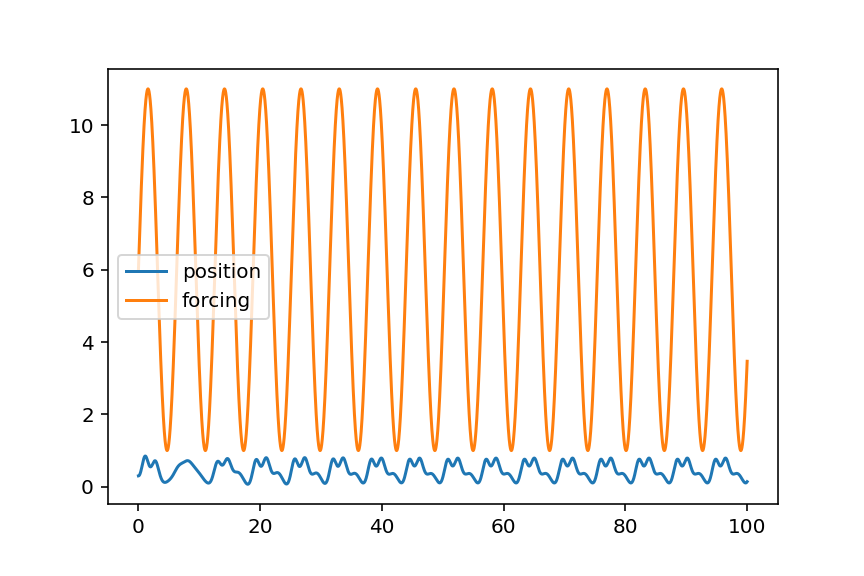

In [248]:
%matplotlib notebook
pos = x1[:-1]
plt.plot(tm,pos, label = 'position')
plt.plot(tm, F2, label = 'forcing')
plt.legend()

In [225]:
plt.plot(tm, F2)


In [249]:
I0, k, c, F, Ac_F, r, F_p  = sm.symbols('I0, k, c, F, A_c_F, r, F_p')
c = I0 + Ac_F/(1+ sm.exp(-r*(F - F_p)))

cc1 = c.subs({I0 : 0.3, Ac_F: 0.5, r : 3.95, F_p : 3.5})
cc2 = sm.lambdify(F, cc1, "numpy" )
cc2

t, f0 = sm.symbols('t, f_0')
F = f0*sm.sin(t) + 1.2*f0
F1 = sm.lambdify([f0, t], F, "numpy")
F1

tm = np.linspace(0, 100, 10001)
F2=F1(5,tm)
F2



array([6.        , 6.04999917, 6.09999333, ..., 3.382452  , 3.42518316,
       3.46817179])

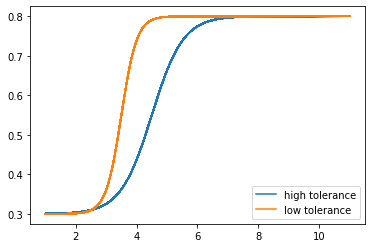

In [250]:
%matplotlib inline
plt.plot(F2, c2(F2), label = "high tolerance")
plt.plot(F2, cc2(F2), label = "low tolerance")
plt.legend()


In [251]:
I0, k, c, F, Ac_F, r, F_p  = sm.symbols('I0, k, c, F, A_c_F, r, F_p')
c = I0 + Ac_F/(1+ sm.exp(-r*(F - F_p)))
kk1 = c.subs({I0 : 0.1, Ac_F: 3.5, r : 0.6, F_p : 0.5})
kk2 = sm.lambdify(F, kk1, "numpy" )

t = np.linspace(0, 10, 101)
F = 5*np.sin(t) + 5

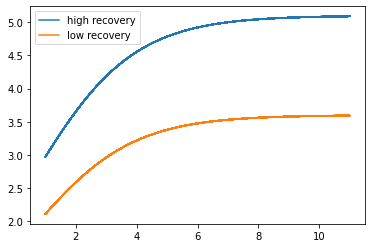

In [252]:
%matplotlib inline
plt.plot(F2, k2(F2),  label = "high recovery")
plt.plot(F2, kk2(F2), label = "low recovery")
plt.legend()



In [253]:
Ts = 10/1000
N = np.shape(F2)[0]

xx1 = np.zeros(N+1);
xx2 = np.zeros(N+1);
xx1[0] = 0.3; ##Initial position
xx2[0] = 0  ##Initial velocity

M = 2

for i in np.arange(N):
    #print(i)
    Ki = kk2(F2[i]); Ci = cc2(F2[i])
    
    a11 = 1; a12 = Ts; 
    a21 = -(Ki*Ts)/M; a22 = 1 - ((Ts*Ci)/M)
    
    b11 = 0; b21 = Ts/M
    xx1[i+1] = a11*xx1[i] + a12*xx2[i] + b11*F2[i]
    xx2[i+1] = a21*(3*xx1[i]**2 + 1.0001*xx1[i]) + a22*xx2[i] + b21*F2[i]

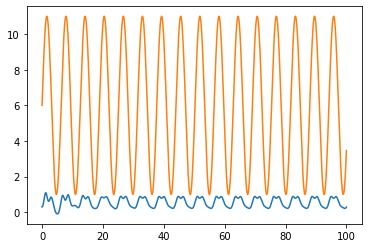

In [254]:
pos1 = xx1[:-1]
plt.plot(tm,pos1, label = 'position')
plt.plot(tm, F2, label = 'forcing')

<IPython.core.display.Javascript object>


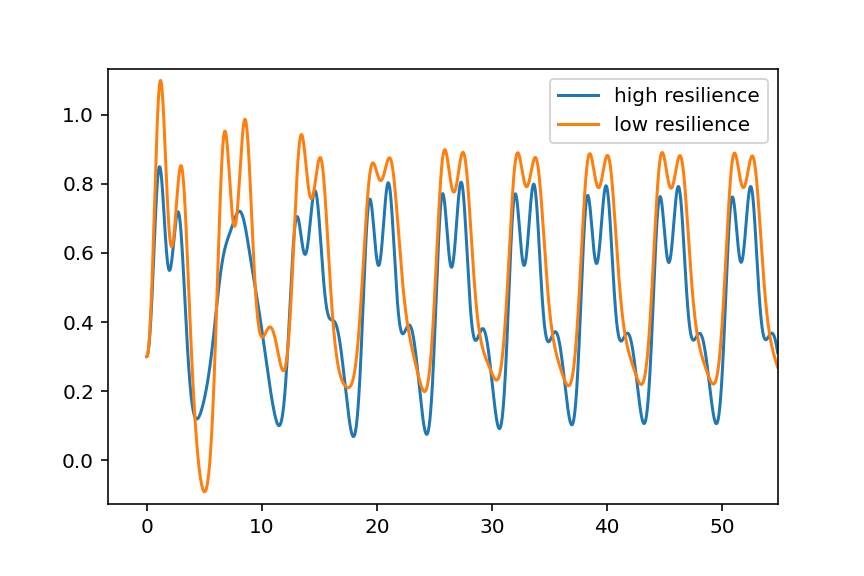

In [255]:
%matplotlib notebook
plt.plot(tm,pos, label = 'high resilience')
plt.plot(tm,pos1, label = 'low resilience')
plt.legend()

In [35]:
Resdf = pd.DataFrame(np.concatenate([pos.reshape(np.shape(pos)[0],1), pos1.reshape(np.shape(pos1)[0],1)], axis=1))
Resdf.columns = ["high resilience", "low resilience"]
Resdf.to_csv("Resilience_simu.csv")

**High tolerance and high recovery scenario for different initial conditions**

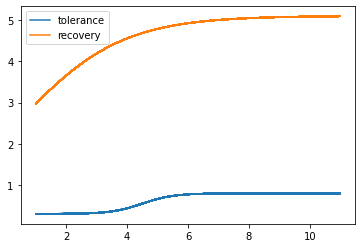

In [199]:
I0, k, c, F, Ac_F, r, F_p  = sm.symbols('I0, k, c, F, A_c_F, r, F_p')
c = I0 + Ac_F/(1+ sm.exp(-r*(F - F_p)))

c1 = c.subs({I0 : 0.3, Ac_F: 0.5, r : 1.95, F_p : 4.5})
c2 = sm.lambdify(F, c1, "numpy" )
c2

t, f0 = sm.symbols('t, f_0')
F = f0*sm.sin(t) + 1.2*f0
F1 = sm.lambdify([f0, t], F, "numpy")
F1

I0, k, c, F, Ac_F, r, F_p  = sm.symbols('I0, k, c, F, A_c_F, r, F_p')
c = I0 + Ac_F/(1+ sm.exp(-r*(F - F_p)))
k1 = c.subs({I0 : 0.1, Ac_F: 5, r : 0.6, F_p : 0.5})
k2 = sm.lambdify(F, k1, "numpy" )

tm = np.linspace(0, 300, 30001)
F2=F1(5,tm)
F2


%matplotlib inline
plt.plot(F2, c2(F2), label = "tolerance")
plt.plot(F2, k2(F2), label = "recovery")
plt.legend()

In [92]:
def spring_damper_simu(Frc, pos, vel, mass):
    
    Ts = 10/1000
    N = np.shape(Frc)[0]

    x1 = np.zeros(N+1);
    x2 = np.zeros(N+1);
    x1[0] = pos; ##Initial position
    x2[0] = vel;  ##Initial velocity

    M = mass

    for i in np.arange(N):
        Ki = k2(Frc[i]); Ci = c2(Frc[i])

        a11 = 1; a12 = Ts; 
        a21 = -(Ki*Ts)/M; a22 = 1 - ((Ts*Ci)/M)

        b11 = 0; b21 = Ts/M
        x1[i+1] = a11*x1[i] + a12*x2[i] + b11*Frc[i]
        x2[i+1] =  a21*(3*x1[i]**2 + 1.0001*x1[i]) + a22*x2[i] + b21*Frc[i]
        
    return(x1)

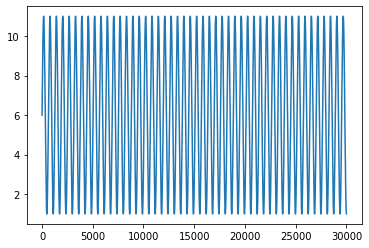

In [93]:
%matplotlib inline
plt.plot(F2)

<IPython.core.display.Javascript object>


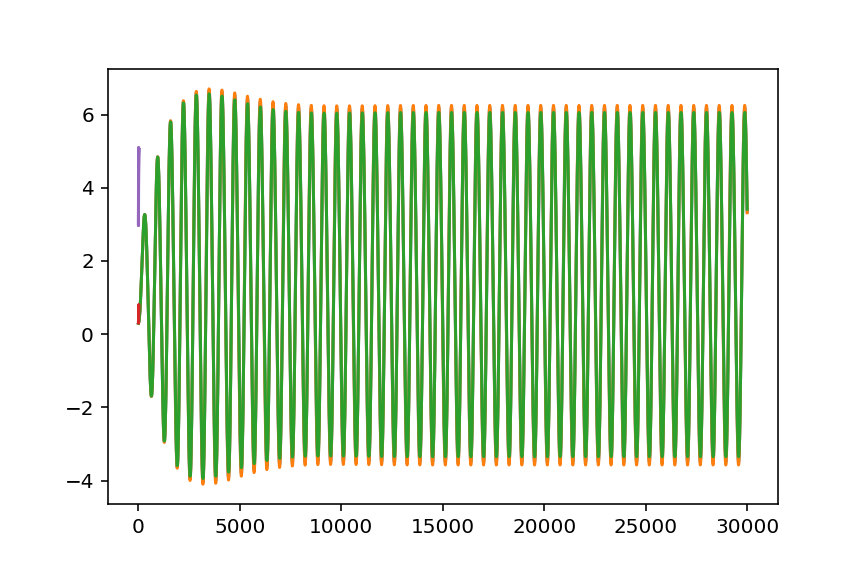

In [94]:
%matplotlib notebook
plt.plot(spring_damper_simu(F2, 0.3, 0.1, 5))
plt.plot(spring_damper_simu(F2, 0.3, 0.1, 4.99))
plt.plot(spring_damper_simu(F2, 0.3, 0.1, 5.02))

In [95]:
init_pos = np.random.uniform(-1, 2, 100)
init_vel = np.random.uniform(0, 1, 100)
init_mass = np.random.uniform(1, 4, 100)

In [96]:
hresl = np.empty(shape=(len(F2)+1,100))
for k in np.arange(100):
    hresl[:,k] = spring_damper_simu(F2, init_pos[k], init_vel[k], init_mass[k])

In [97]:
hresl_df = pd.DataFrame(hresl)
hresl_df.to_csv('high_resilience_simu.csv')

In [98]:
def spring_damper_simu1(Frc, pos, vel, mass):
    
    Ts = 10/1000
    N = np.shape(Frc)[0]

    x1 = np.zeros(N+1);
    x2 = np.zeros(N+1);
    x1[0] = pos; ##Initial position
    x2[0] = vel;  ##Initial velocity

    M = mass

    for i in np.arange(N):
        Ki = kk2(Frc[i]); Ci = cc2(Frc[i])

        a11 = 1; a12 = Ts; 
        a21 = -(Ki*Ts)/M; a22 = 1 - ((Ts*Ci)/M)

        b11 = 0; b21 = Ts/M
        x1[i+1] = a11*x1[i] + a12*x2[i] + b11*Frc[i]
        x2[i+1] =  a21*(3*x1[i]**2 + 1.0001*x1[i]) + a22*x2[i] + b21*Frc[i]
        
    return(x1)


In [99]:
lresl = np.empty(shape=(len(F2)+1,100))
for k in np.arange(100):
    lresl[:,k] = spring_damper_simu1(F2, init_pos[k], init_vel[k], init_mass[k])

In [100]:
lresl_df = pd.DataFrame(lresl)
lresl_df.to_csv('low_resilience_simu.csv')